In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [17]:
data = pd.read_csv("/Users/hallanmiranda/Documents/repo/analise_BI/_WITH_beneficios_agg_AS_SELECT_vb_vaga_id_STRING_AGG_b_nome_AS_b_202412071933.csv")

In [18]:
data['posicao'].unique()

array(['Analista de Dados', 'Cientista de Dados', 'Engenheiro de Dados'],
      dtype=object)

In [ ]:
# pd.contem
# len

# df['descricao_simplificada'].str.contains('pcd', case=False, na=False)

In [19]:
data = data.apply(lambda x: x.lower() if isinstance(x, str) else x)
#data = data.apply(lambda x: x.replace('.', ',') if isinstance(x, str) else x)



# Teste no data set Sheets 

In [23]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv('/Users/hallanmiranda/Documents/repo/analise_BI/new-analytics_bi.csv')
data.head(5)


,Nome,Nível,Empresa,Ensinio Superior,Ferramentas
0,Analista de Power BI,Jr,Randstad - Filial,"Administração, Engenharia de produção, áreas a...","Power BI, Pacote office, Excel"
1,ANALISTA DE BI JR,JR,Spread Tecnologia4.2,Completa ou Cursando em áreas relacionadas a TI,"Power BI, Tableau, Qlik, ETL , SQL"
2,Estagiário de BI,Estagiário,BAGAGGIO3.2,"Engenharia, Economia, Marketing ou áreas afins;","Excel, SQL, Big Query, Power BI"
3,Analista de BI,pleno,Grupo Domingão1.0,NaN,"Postgre SQL, DAX , Linguagem M, Power BI, RES..."
4,ANALISTA DE BI,JR,O Emprego - Vagas Brasil,Bacharelado | Licenciatura | Tecnologia.,"Power BI, SQL, Excel"


In [25]:
# Função para limpar os dados
def clean_data(data):
    # Remover espaços extras e transformar em minúsculas
    return data.applymap(lambda x: ' '.join(x.strip().lower().split()) if isinstance(x, str) else x)

# Limpar os dados
data = clean_data(data)

/var/folders/ws/9gpb0_fn3cq7vzb6mxqc169c0000gn/T/ipykernel_5961/1026279822.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return data.applymap(lambda x: ' '.join(x.strip().lower().split()) if isinstance(x, str) else x)


In [26]:
# Renomear colunas
data.columns = [
    'Job_Title', 'Level', 'Company', 'Education', 'Tool'
    ]

In [27]:
data = data.apply(lambda x: x.lower() if isinstance(x, str) else x)
data = data.apply(lambda x: x.replace('.', ',') if isinstance(x, str) else x)



In [28]:
# Contar as ocorrências de cada ferramenta
tool_counts = data['Tool'].str.split(', ').explode().value_counts()

tool_counts.head()

Tool
power bi    96
sql         59
excel       35
python      31
etl         27
Name: count, dtype: int64

In [29]:
# Contar as ocorrências de cada ferramenta
tool_counts = data['Tool'].str.split(', ').explode().value_counts()

# Tratar dados de formação acadêmica
data['Education_Required'] = data['Education'].notna().astype(int)  # 1 para vagas com exigência de formação, 0 caso contrário

# Contar vagas que exigem formação acadêmica
education_count = data['Education_Required'].sum()

# Mostrar número de vagas que exigem formação acadêmica
f"Vagas que exigem formação acadêmica: {education_count}"


'Vagas que exigem formação acadêmica: 28'

In [30]:
# Função para verificar duplicatas dentro de cada linha
def check_duplicates(tools):
    if pd.isna(tools):  # Lida com valores nulos
        return False
    tools_list = tools.split(', ')  # Divide as ferramentas em uma lista
    return len(tools_list) != len(set(tools_list))  # Verifica duplicatas

# Criar uma nova coluna indicando duplicatas
data['Has_Duplicates'] = data['Tool'].apply(check_duplicates)

# Filtrar linhas onde há duplicatas
duplicated_rows = data[data['Has_Duplicates']]

# Exibir as primeiras linhas com duplicatas
duplicated_rows.head()


,Job_Title,Level,Company,Education,Tool,Education_Required,Has_Duplicates
54,analista power bi sênior,sênior,netvagas,NaN,"power bi, excel, r, python, sql, etl, mlops, s...",0,True


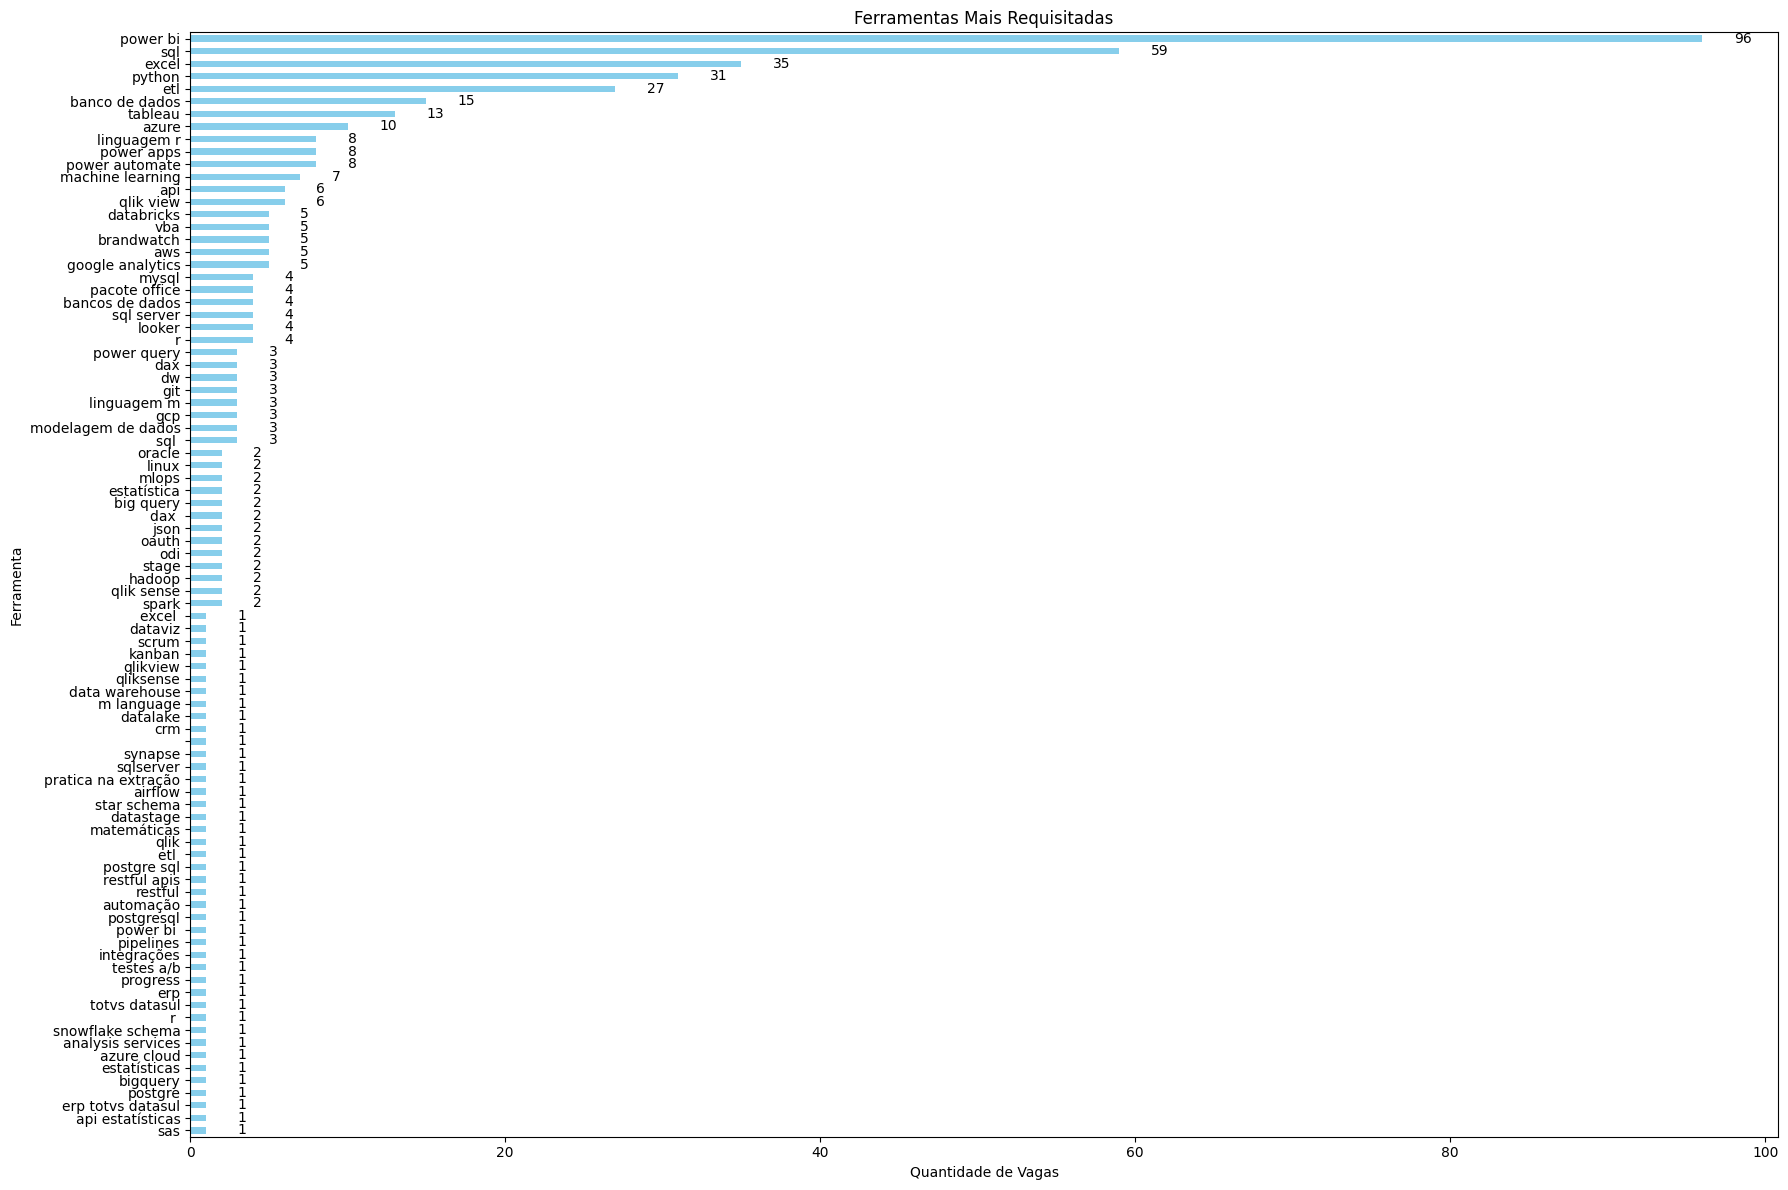

In [38]:
# Contar as ocorrências de cada ferramenta
tool_counts = data['Tool'].str.split(', ').explode().value_counts()

# Garantir que há dados para plotar
if tool_counts.empty:
    print("Nenhuma ferramenta encontrada nos dados.")
else:
    # Configurar o gráfico
    plt.figure(figsize=(18, 12))
    ax = tool_counts.plot(
        kind='barh',
        color='skyblue',
        title='Ferramentas Mais Requisitadas',
    )
    ax.set_xlabel('Quantidade de Vagas')
    ax.set_ylabel('Ferramenta')

    # Inverter o eixo Y para que a maior barra fique no topo
    plt.gca().invert_yaxis()

    # Adicionar valores nas barras
    for i, value in enumerate(tool_counts):
        ax.text(value + 2, i, str(value), va='center')

    plt.tight_layout()
    plt.show()


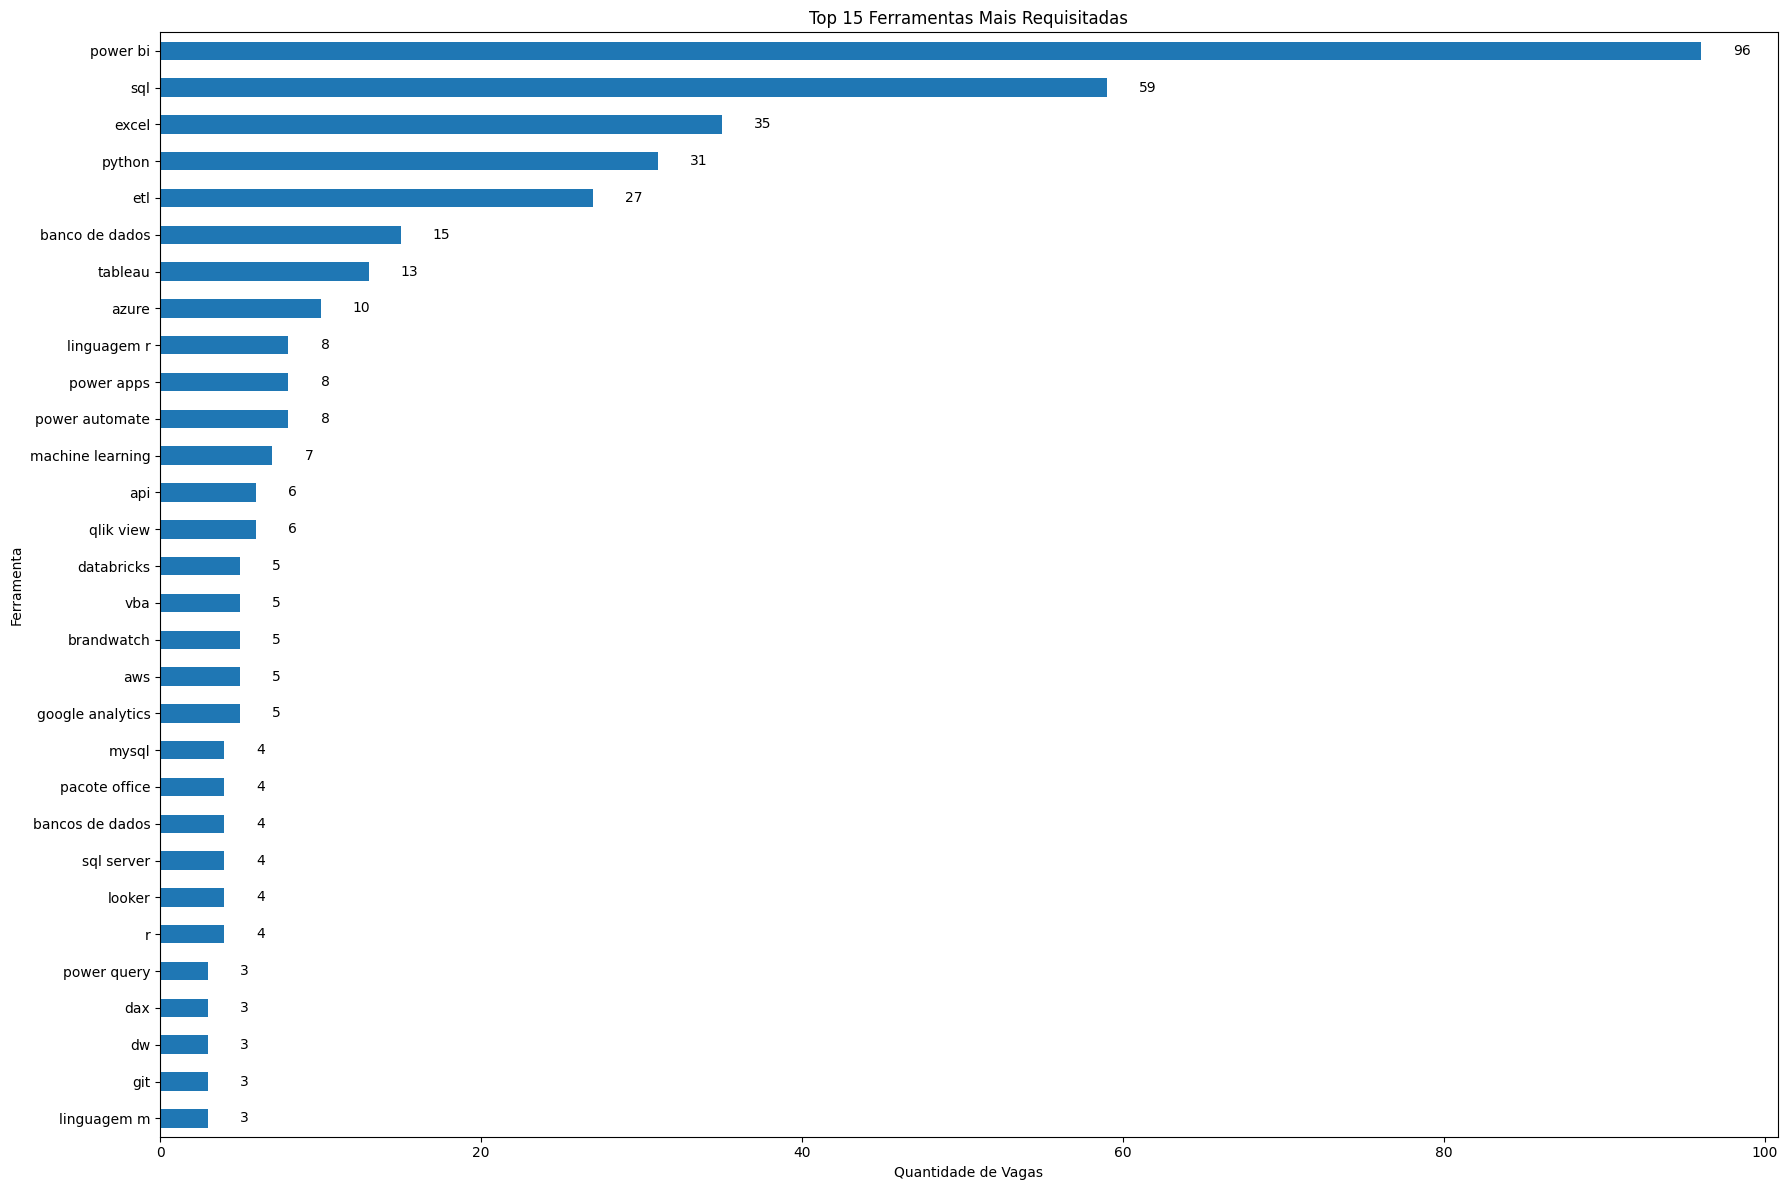

In [39]:
# Adicionar valores no gráfico de barras horizontais
plt.figure(figsize=(18, 12))
ax = tool_counts[:30].plot(kind='barh', title='Top 15 Ferramentas Mais Requisitadas', xlabel='Quantidade de Vagas', ylabel='Ferramenta')
plt.gca().invert_yaxis()  # Inverter para a maior barra no topo

for i, value in enumerate(tool_counts[:30]):
    ax.text(value + 2, i, str(value), va='center')
plt.tight_layout()
plt.show(block=True)


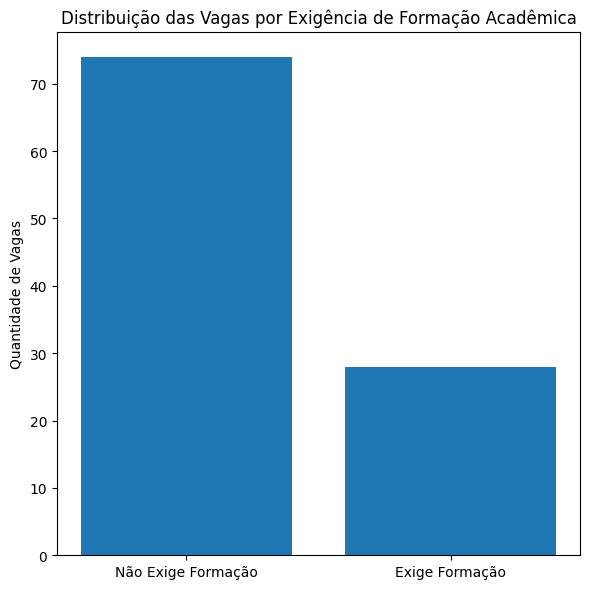

In [40]:

# Gráfico de barras para formação acadêmica (simples)
education_labels = ['Não Exige Formação', 'Exige Formação']
education_counts = [len(data) - education_count, education_count]

plt.figure(figsize=(6, 6))
plt.bar(education_labels, education_counts)
plt.title('Distribuição das Vagas por Exigência de Formação Acadêmica')
plt.ylabel('Quantidade de Vagas')
plt.tight_layout()
plt.show(block=True)

